In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [2]:
#Cargamos csv
operaciones_sube=pd.read_csv('TP.csv',delimiter=';',encoding='cp1252')

# Exploratory Data Analysis


Dataset operaciones con sube

In [3]:
#Visualizamos nuestro dataset
operaciones_sube.head()

,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
0,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540,NORMAL,12125,201903
1,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,ATRIBUTO SOCIAL,1,201903
2,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,NORMAL,582526,201903
3,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,OTRO,20,201903
4,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 550,NORMAL,890,201903


In [4]:
type(operaciones_sube)

pandas.core.frame.DataFrame

In [5]:
np.shape(operaciones_sube)

(102691, 9)

In [6]:
columnas=operaciones_sube.columns
columnas

Index(['PERIODO', 'MODO', 'JURISDICCION', 'GRUPOTARIFARIO', 'EMPRESA', 'LINEA',
       'TIPOPASAJE', 'SumadeCANTIDAD', 'ACTUALIZACION'],
      dtype='object')

In [7]:
instancias=operaciones_sube.index
instancias

RangeIndex(start=0, stop=102691, step=1)

In [8]:
print("Nuestro dataset contiene "+str(np.shape(operaciones_sube)[0])+" renglones y "+str(np.shape(operaciones_sube)[1])+" columnas")

Nuestro dataset contiene 102691 renglones y 9 columnas


In [9]:
#Revisamos si hay nulls
col_nulls = operaciones_sube.isnull().any()
col_nulls

PERIODO           False
MODO              False
JURISDICCION      False
GRUPOTARIFARIO    False
EMPRESA           False
LINEA             False
TIPOPASAJE        False
SumadeCANTIDAD    False
ACTUALIZACION     False
dtype: bool

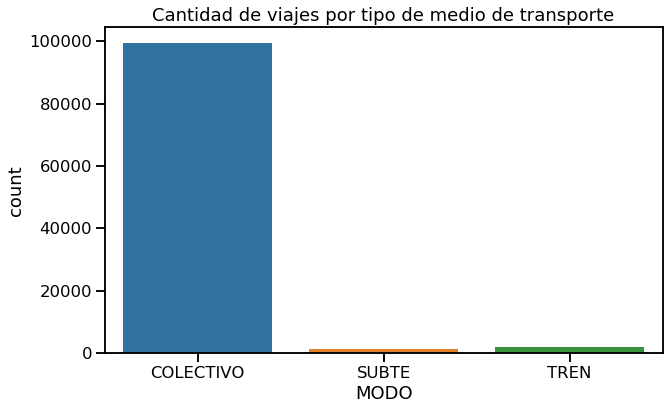

In [10]:
#Analizamos la cantidad de datos que posee el dataset de cada tipo de transporte
sns.set_context("talk")
plt.figure(figsize=(10,6))
sns.countplot(x="MODO", data=operaciones_sube)
plt.title("Cantidad de viajes por tipo de medio de transporte")
plt.show()

In [11]:
#Nos quedamos con los colectivos que poseen mayoría de información
operaciones_sube_c = operaciones_sube.loc[operaciones_sube['MODO'] == 'COLECTIVO']
operaciones_sube_c

,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
0,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540,NORMAL,12125,201903
1,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,ATRIBUTO SOCIAL,1,201903
2,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,NORMAL,582526,201903
3,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,OTRO,20,201903
4,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 550,NORMAL,890,201903
5,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 550A,NORMAL,217736,201903
6,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 550A,OTRO,9,201903
7,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 552A,ATRIBUTO SOCIAL,1,201903
8,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 552A,NORMAL,295316,201903
9,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 552A,OTRO,9,201903


In [12]:
np.shape(operaciones_sube_c)

(99490, 9)

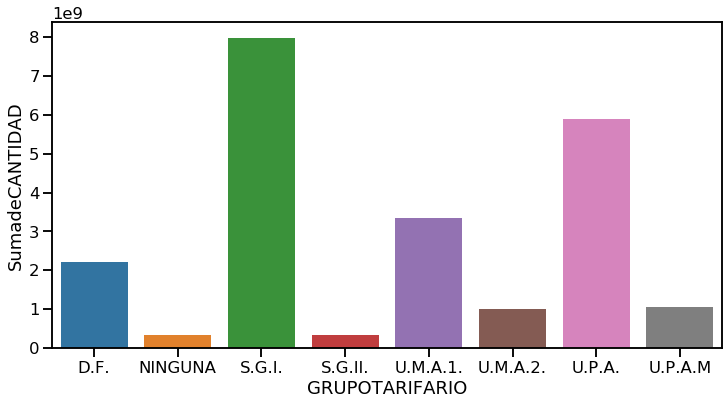

In [13]:
#Analizamos los grupos tarifarios para encontrar tendencias
plt.figure(figsize=(12,6))
grupos=operaciones_sube_c.groupby("GRUPOTARIFARIO").sum().reset_index()
barras_grupos=sns.barplot(x="GRUPOTARIFARIO", y="SumadeCANTIDAD", data=grupos)
barras_grupos.set_xticklabels(barras_grupos.get_xticklabels())
plt.title("")
plt.show()

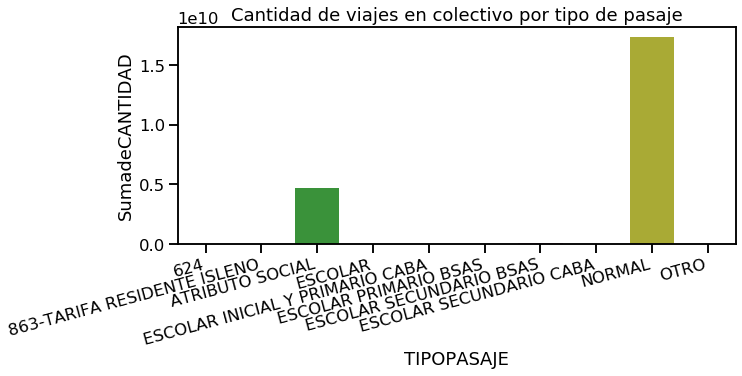

In [14]:
#Analizamos los tipos de pasaje
plt.figure(figsize=(10,4))
boletos=operaciones_sube_c.groupby("TIPOPASAJE").sum().reset_index()
barras_boletos=sns.barplot(x="TIPOPASAJE", y="SumadeCANTIDAD", data=boletos)
barras_boletos.set_xticklabels(barras_boletos.get_xticklabels(),rotation=15,ha="right")
plt.title("Cantidad de viajes en colectivo por tipo de pasaje")
plt.show()

In [15]:
operaciones_sube_c_normal=operaciones_sube_c.loc[operaciones_sube['TIPOPASAJE'] == 'NORMAL']
operaciones_sube_c_normal

,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
0,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540,NORMAL,12125,201903
2,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,NORMAL,582526,201903
4,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 550,NORMAL,890,201903
5,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 550A,NORMAL,217736,201903
8,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 552A,NORMAL,295316,201903
10,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 553A,NORMAL,272438,201903
12,201301,COLECTIVO,MUNICIPAL,NINGUNA,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 503A,NORMAL,735878,201903
14,201301,COLECTIVO,MUNICIPAL,NINGUNA,CONSULTORES ASOCIADOS ECOTRANS S.A.,LINEA 635,NORMAL,141752,201903
16,201301,COLECTIVO,MUNICIPAL,NINGUNA,COOPERATIVA DE TRABAJO 3 DE JULIO LIMITADA,LINEA 500E,NORMAL,2559,201903
17,201301,COLECTIVO,MUNICIPAL,NINGUNA,COOPERATIVA DE TRABAJO 3 DE JULIO LIMITADA,LINEA 503F,NORMAL,91687,201903


In [16]:
operaciones_sube_c_atributo=operaciones_sube_c.loc[operaciones_sube['TIPOPASAJE'] == 'ATRIBUTO SOCIAL']
operaciones_sube_c_atributo

,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
1,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 540A,ATRIBUTO SOCIAL,1,201903
7,201301,COLECTIVO,MUNICIPAL,NINGUNA,AUTOBUSES SANTA FE S.R.L,LINEA 552A,ATRIBUTO SOCIAL,1,201903
21,201301,COLECTIVO,MUNICIPAL,NINGUNA,EMPRESA LINEA SIETE SAT,LINEA 503G,ATRIBUTO SOCIAL,19,201903
24,201301,COLECTIVO,MUNICIPAL,NINGUNA,EMPRESA LINEA SIETE SAT,LINEA 506E,ATRIBUTO SOCIAL,2,201903
27,201301,COLECTIVO,MUNICIPAL,NINGUNA,EMPRESA NUEVE DE JULIO S.A.T.,LINEA NORTE,ATRIBUTO SOCIAL,2,201903
32,201301,COLECTIVO,MUNICIPAL,NINGUNA,EXPRESO MALVINAS ARGENTINAS SRL,LINEA 562,ATRIBUTO SOCIAL,2,201903
35,201301,COLECTIVO,MUNICIPAL,NINGUNA,MICRO OMNIBUS GENERAL SAN MARTIN SAC,LINEA 670,ATRIBUTO SOCIAL,4,201903
48,201301,COLECTIVO,MUNICIPAL,NINGUNA,TREINTA DE AGOSTO,LINEA 507,ATRIBUTO SOCIAL,59,201903
59,201301,COLECTIVO,MUNICIPAL,U.M.A.1.,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,LINEA 628,ATRIBUTO SOCIAL,1,201903
79,201301,COLECTIVO,MUNICIPAL,U.M.A.1.,EMPRESA CIUDAD DE SAN FERNANDO SA,LINEA 710,ATRIBUTO SOCIAL,4,201903


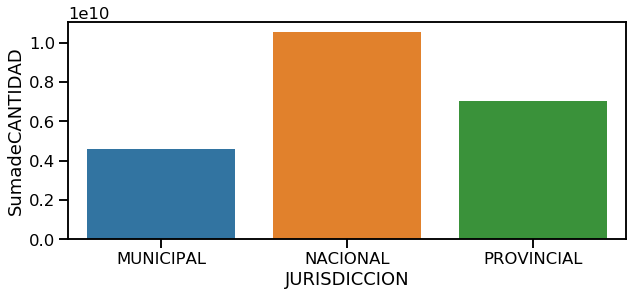

In [17]:
#Analizamos los datos referidos a la jurisdicción para encontrar tendencias
plt.figure(figsize=(10,4))
jurisdicciones=operaciones_sube_c.groupby("JURISDICCION").sum().reset_index()
barras_jurisdicciones=sns.barplot(x="JURISDICCION", y="SumadeCANTIDAD", data=jurisdicciones)
barras_jurisdicciones.set_xticklabels(barras_jurisdicciones.get_xticklabels())
plt.title("")
plt.show()

In [18]:
media_tot_c = np.mean(operaciones_sube_c['SumadeCANTIDAD'])

In [19]:
media_tot_c

222654.4328173686

In [20]:
desvio_std_tot_c = np.std(operaciones_sube_c['SumadeCANTIDAD'])
print("El desvio estándard de la variable total para todos los viajes en colectivo es " + str(desvio_std_tot_c))

El desvio estándard de la variable total para todos los viajes en colectivo es 390316.6787375094


In [21]:
#Analizamos los valores que manejamos para saber la media, el mínimo, el máximo, entre otros
operaciones_sube_c.describe()

,PERIODO,SumadeCANTIDAD,ACTUALIZACION
count,99490.000000,9.949000e+04,99490.000000
mean,201669.287607,2.226544e+05,201904.889577
std,190.794038,3.903186e+05,2.187882
min,201301.000000,1.000000e+00,201903.000000
25%,201508.000000,1.552000e+03,201903.000000
50%,201709.000000,4.720000e+04,201903.000000
75%,201809.000000,2.719370e+05,201907.000000
max,201908.000000,5.287912e+06,201908.000000


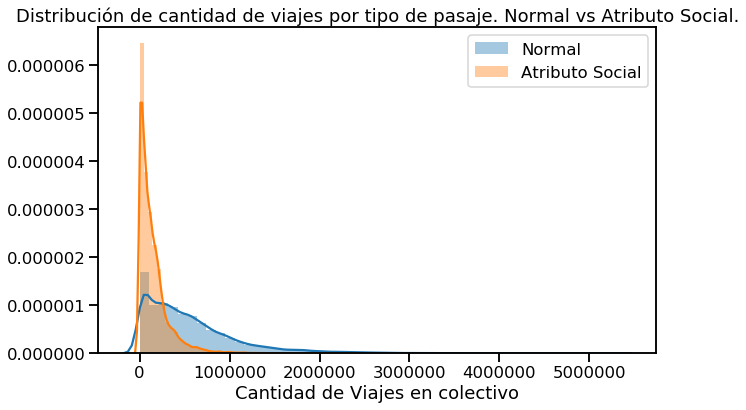

In [22]:
#Analizamos los dos tipos de pasajes con mayor cantidad de viajes registrados
plt.figure(figsize=(10,6))
sns.distplot(operaciones_sube_c.loc[operaciones_sube_c.TIPOPASAJE == 'NORMAL']['SumadeCANTIDAD'], label = 'Normal')
sns.distplot(operaciones_sube_c.loc[operaciones_sube_c.TIPOPASAJE == 'ATRIBUTO SOCIAL']['SumadeCANTIDAD'], label = 'Atributo Social')
plt.title('Distribución de cantidad de viajes por tipo de pasaje. Normal vs Atributo Social.')
plt.xlabel('Cantidad de Viajes en colectivo')
plt.legend(loc='upper right')
plt.show()

In [25]:
#Modificacion de valores para PERIODOS
for i, p in enumerate(list(operaciones_sube_c['PERIODO'].unique())):
    operaciones_sube_c.loc[operaciones_sube_c['PERIODO'] == p, 'PERIODO'] = i + 1
    

In [26]:
#Creamos una pivot con la evolución mensual de cantidad de viajes por el tipo de pasaje de los mismos
operaciones_sube_c_tipopasaje = pd.pivot_table(operaciones_sube_c,values = 'SumadeCANTIDAD',columns = 'TIPOPASAJE', index = operaciones_sube_c.PERIODO.values, aggfunc = np.sum, fill_value=0 )
operaciones_sube_c_tipopasaje

TIPOPASAJE,624,863-TARIFA RESIDENTE ISLENO,ATRIBUTO SOCIAL,ESCOLAR,ESCOLAR INICIAL Y PRIMARIO CABA,ESCOLAR PRIMARIO BSAS,ESCOLAR SECUNDARIO BSAS,ESCOLAR SECUNDARIO CABA,NORMAL,OTRO
1,0,0,3032,0,0,0,0,0,235005128,26925
2,0,0,837360,0,0,0,0,0,222228898,5238
3,0,0,4315198,0,0,0,0,0,282179904,2403
4,0,0,8910755,0,0,0,0,0,286418366,30
5,0,0,13052715,0,0,0,0,0,292247672,3
6,0,0,14715493,0,0,0,0,0,268341443,4
7,0,0,17219184,0,0,0,0,0,271174024,2
8,0,0,17235582,0,0,0,0,0,292341602,1
9,0,0,19984607,0,0,0,0,0,273684196,0
10,0,0,23806650,0,0,0,0,0,298147316,0


In [27]:
operaciones_sube_c_tipopasaje.shape

(80, 10)

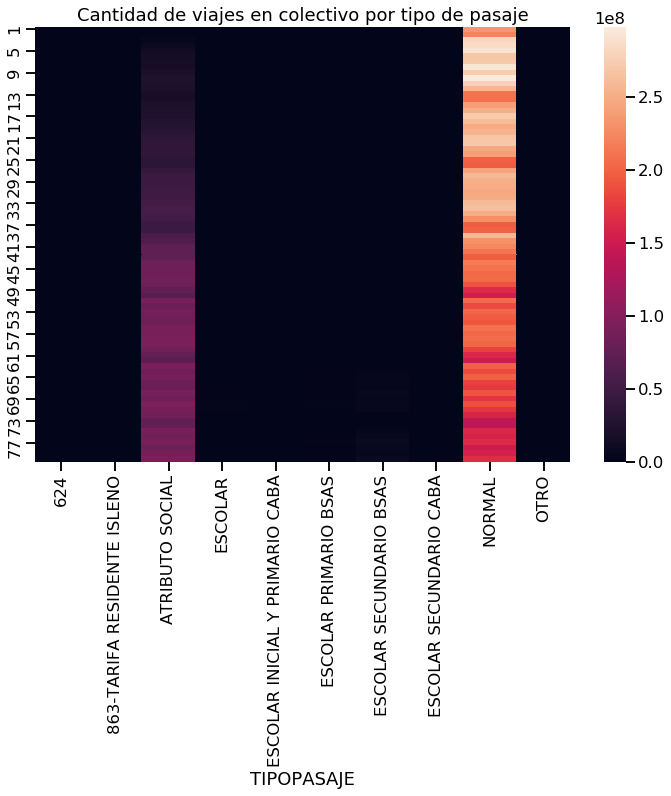

In [28]:
#Analizamos la evolución mes a mes de los tipos de pasajes a través de un heatmap
plt.figure(figsize=(12,8))
sns.heatmap(operaciones_sube_c_tipopasaje)
plt.title("Cantidad de viajes en colectivo por tipo de pasaje")
plt.show()

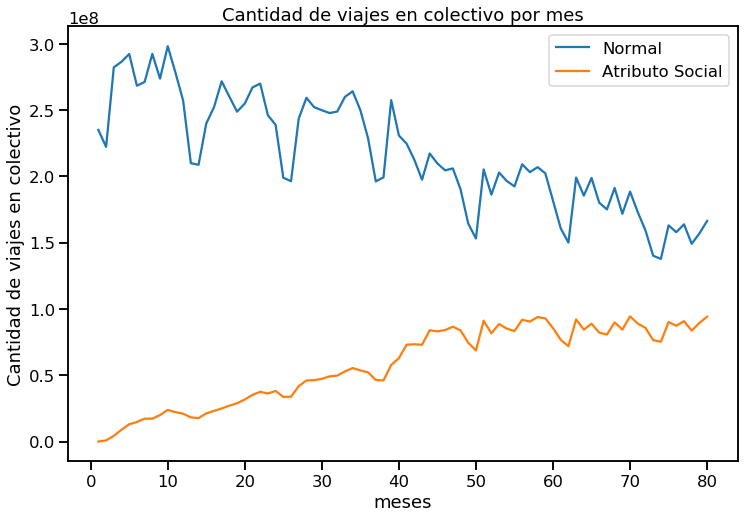

In [29]:
#Analizamos a través de los meses la evolución de la cantidad de meses para los tipos normales y de atributo social
plt.figure(figsize=(12,8))
plt.plot(operaciones_sube_c_tipopasaje.index, operaciones_sube_c_tipopasaje['NORMAL'], label='Normal');
plt.plot(operaciones_sube_c_tipopasaje.index, operaciones_sube_c_tipopasaje['ATRIBUTO SOCIAL'], label='Atributo Social');
plt.legend(loc='upper right')
plt.title('Cantidad de viajes en colectivo por mes')
plt.ylabel('Cantidad de viajes en colectivo')
plt.xlabel('meses')
plt.show()

In [30]:
#Profundizando en lo que es CABA, es decir, jurisdicción nacional, creamos la siguiente tabla
nacional=operaciones_sube_c.loc[operaciones_sube_c['JURISDICCION']=="NACIONAL"]
nacional

,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
218,1,COLECTIVO,NACIONAL,D.F.,17 DE AGOSTO S.A.,LINEA 26,NORMAL,921373,201903
219,1,COLECTIVO,NACIONAL,D.F.,17 DE AGOSTO S.A.,LINEA 26,OTRO,403,201903
220,1,COLECTIVO,NACIONAL,D.F.,COLECTIVEROS UNIDOS S.A.,LINEA 106,ATRIBUTO SOCIAL,2,201903
221,1,COLECTIVO,NACIONAL,D.F.,COLECTIVEROS UNIDOS S.A.,LINEA 106,NORMAL,995527,201903
222,1,COLECTIVO,NACIONAL,D.F.,COLECTIVEROS UNIDOS S.A.,LINEA 106,OTRO,439,201903
223,1,COLECTIVO,NACIONAL,D.F.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,NORMAL,715479,201903
224,1,COLECTIVO,NACIONAL,D.F.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,OTRO,166,201903
225,1,COLECTIVO,NACIONAL,D.F.,EMPRESA DE TRANSP. TTE. GRAL. ROCA S.A,LINEA 108,NORMAL,518071,201903
226,1,COLECTIVO,NACIONAL,D.F.,EMPRESA DE TRANSP. TTE. GRAL. ROCA S.A,LINEA 108,OTRO,286,201903
227,1,COLECTIVO,NACIONAL,D.F.,GENERAL TOMAS GUIDO S.A.C.I.F.,LINEA 25,NORMAL,459090,201903


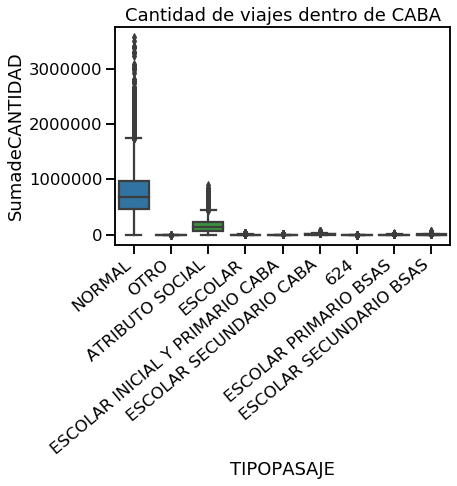

In [31]:
ay = sns.boxplot(x = nacional.TIPOPASAJE, y = nacional.SumadeCANTIDAD, data = nacional)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de viajes dentro de CABA")
plt.show()

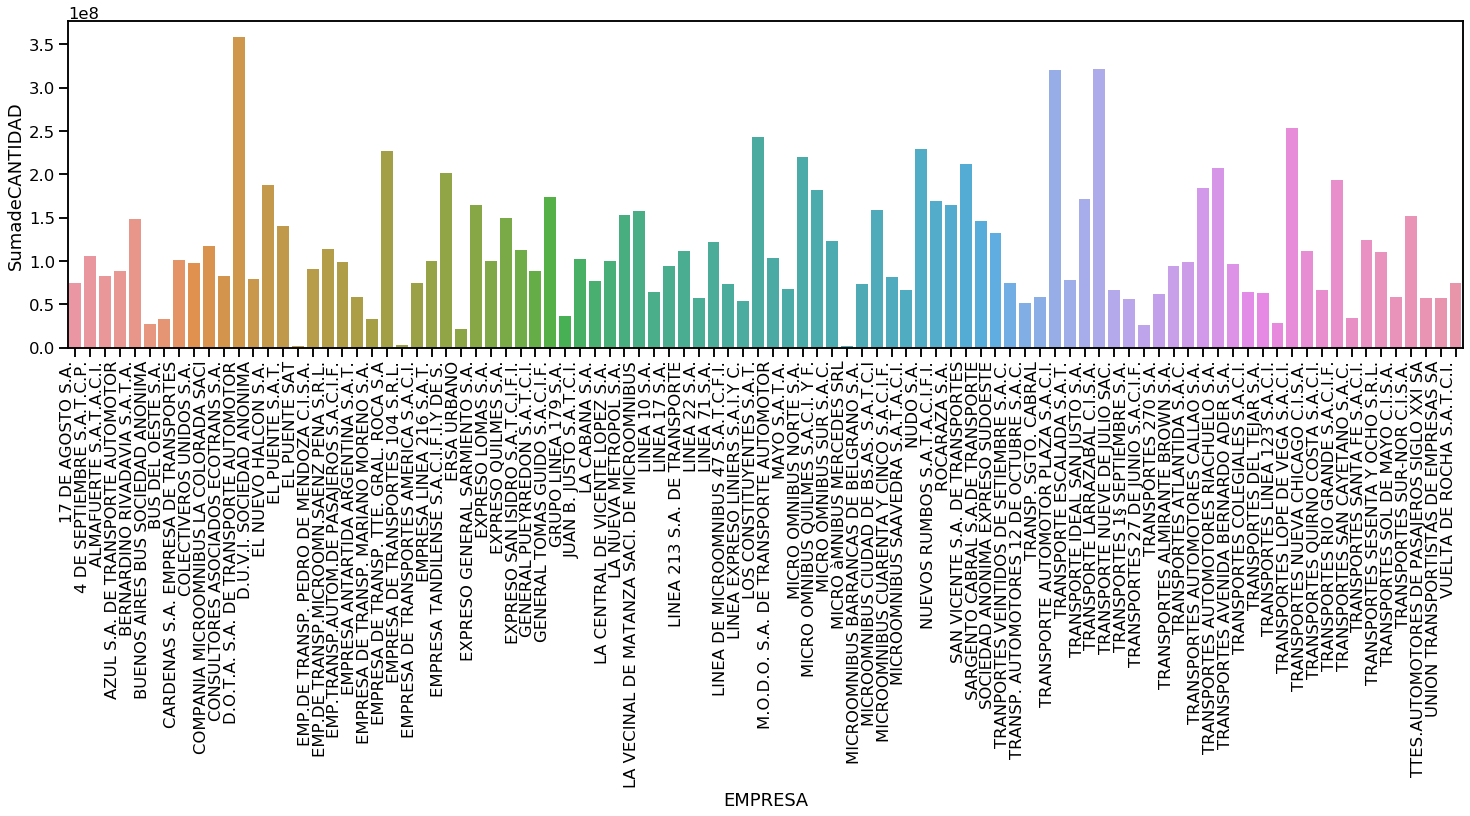

In [32]:
#Analizamos las empresas por la cantidad de viajes de las mismas
plt.figure(figsize=(25,6))
nacionals=nacional.groupby("EMPRESA").sum().reset_index()
barras_nacionals=sns.barplot(x="EMPRESA", y="SumadeCANTIDAD", data=nacionals)
barras_nacionals.set_xticklabels(barras_nacionals.get_xticklabels(),rotation=90,ha="right")
plt.title("")
plt.show()


# MACHINE LEARNING



Aprendizaje supervisado - Regresión 

## Analizamos una empresa en particular filtrando la misma

In [33]:
empresa = operaciones_sube_c.loc[operaciones_sube['EMPRESA'] == 'NUEVOS RUMBOS S.A.T.A.C.I.F.I.']
empresa

,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
254,1,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,ATRIBUTO SOCIAL,3,201903
255,1,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,NORMAL,2098201,201903
256,1,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,OTRO,829,201903
1148,2,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,ATRIBUTO SOCIAL,3756,201903
1149,2,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,NORMAL,2072145,201903
1150,2,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,OTRO,1,201903
2024,3,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,ATRIBUTO SOCIAL,20454,201903
2025,3,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,NORMAL,2469437,201903
2871,4,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,ATRIBUTO SOCIAL,45492,201903
2872,4,COLECTIVO,NACIONAL,D.F.,NUEVOS RUMBOS S.A.T.A.C.I.F.I.,LINEA 132,NORMAL,2557428,201903


In [34]:
#Agrupamos por periodo esta empresa
empresa2=empresa.groupby("PERIODO").sum().reset_index()
empresa2

,PERIODO,SumadeCANTIDAD,ACTUALIZACION
0,1,2099033,605709
1,2,2075902,605709
2,3,2489891,403806
3,4,2602920,403806
4,5,2679246,403806
5,6,2384776,403806
6,7,2399991,403806
7,8,2644099,403806
8,9,2559162,403806
9,10,2712842,403806


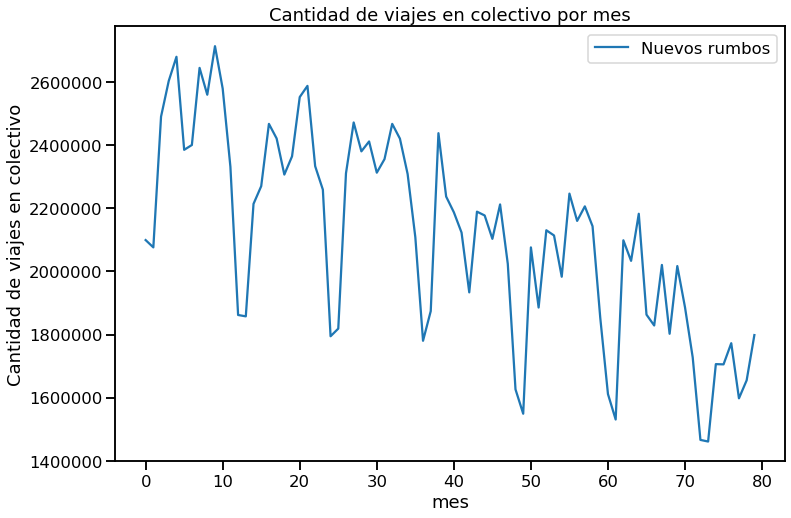

In [35]:
plt.figure(figsize=(12,8))
plt.plot(empresa2.index, empresa2['SumadeCANTIDAD'], label='Nuevos rumbos');
plt.legend(loc='upper right')
plt.title('Cantidad de viajes en colectivo por mes')
plt.ylabel('Cantidad de viajes en colectivo')
plt.xlabel('mes')
plt.show()

In [36]:
#Empezamos a trabajar sobre el método de regresión lineal dentro de aprendizaje supervisado
x = empresa2.drop(['ACTUALIZACION','SumadeCANTIDAD'], axis=1)

In [37]:
y = np.array(empresa2[["SumadeCANTIDAD"]])

In [38]:
empresa2.describe()

,PERIODO,SumadeCANTIDAD,ACTUALIZACION
count,80.0000,8.000000e+01,8.000000e+01
mean,40.5000,2.115240e+06,6.940479e+05
std,23.2379,3.143517e+05,3.866388e+05
min,1.0000,1.461281e+06,4.038060e+05
25%,20.7500,1.860802e+06,4.038060e+05
50%,40.5000,2.136536e+06,4.038150e+05
75%,60.2500,2.357482e+06,8.580878e+05
max,80.0000,2.712842e+06,1.615256e+06


In [39]:
y
y.shape

(80, 1)

In [40]:
#Dividimos nuestros datos x e y en train 90% y test 20%
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

In [41]:
#Ejecutamos el modelo de rl
lr = LinearRegression()

In [42]:
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
ypred = lr.predict(xtest)
ypred.shape

(16, 1)

In [44]:
#Calculamos los errores de nuestra regresión
np.sqrt(mean_squared_error(ytest, ypred))

237422.9109596647

In [45]:
mean_squared_error(ytest, ypred)

56369638648.56087

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
mean_absolute_error(ytest, ypred)

179427.10512115213

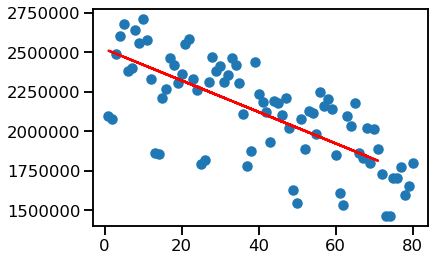

In [48]:
#Modelo regresor comparado a valores reales de nuevos rumbos
plt.scatter(x, y)
plt.plot(xtest, ypred, color='red')
plt.show()

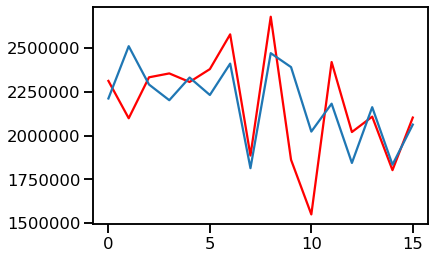

In [49]:
f1 = plt.plot(ytest, c='red')
f2 = plt.plot(ypred)
plt.show()

## Analizaremos la empresa con mayor cantidad de viajes la cual es DOTA

In [50]:
empresa3 = operaciones_sube_c.loc[operaciones_sube['EMPRESA'] == 'D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR']
empresa3


,PERIODO,MODO,JURISDICCION,GRUPOTARIFARIO,EMPRESA,LINEA,TIPOPASAJE,SumadeCANTIDAD,ACTUALIZACION
223,1,COLECTIVO,NACIONAL,D.F.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,NORMAL,715479,201903
224,1,COLECTIVO,NACIONAL,D.F.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,OTRO,166,201903
328,1,COLECTIVO,NACIONAL,S.G.I.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 101,NORMAL,1093773,201903
329,1,COLECTIVO,NACIONAL,S.G.I.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 101,OTRO,211,201903
330,1,COLECTIVO,NACIONAL,S.G.I.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 28,ATRIBUTO SOCIAL,2,201903
331,1,COLECTIVO,NACIONAL,S.G.I.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 28,NORMAL,2154094,201903
332,1,COLECTIVO,NACIONAL,S.G.I.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 28,OTRO,312,201903
1120,2,COLECTIVO,NACIONAL,D.F.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,ATRIBUTO SOCIAL,1964,201903
1121,2,COLECTIVO,NACIONAL,D.F.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 44,NORMAL,656304,201903
1222,2,COLECTIVO,NACIONAL,S.G.I.,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 101,ATRIBUTO SOCIAL,3373,201903


In [51]:
empresa4=empresa3.groupby("PERIODO").sum().reset_index()
empresa4

,PERIODO,SumadeCANTIDAD,ACTUALIZACION
0,1,3964037,1413321
1,2,3678729,1211418
2,3,4580241,1211418
3,4,4926004,1211418
4,5,5121160,1211418
5,6,4655760,1211418
6,7,4874692,1211418
7,8,5152415,1211418
8,9,4982255,1211418
9,10,5378654,1211418


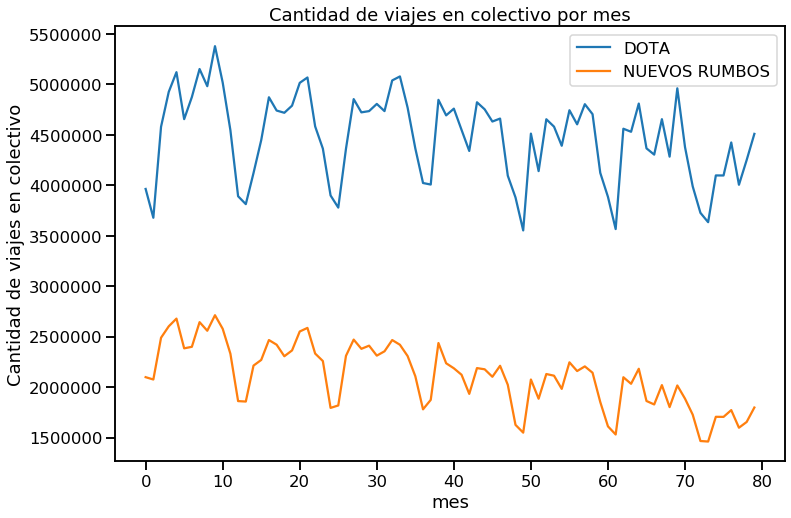

In [52]:
#Comparamos ambas evoluciones respecto a la cantidad de viajes
plt.figure(figsize=(12,8))
plt.plot(empresa4.index, empresa4['SumadeCANTIDAD'], label='DOTA');
plt.plot(empresa2.index, empresa2['SumadeCANTIDAD'], label='NUEVOS RUMBOS');
plt.legend(loc='upper right')
plt.title('Cantidad de viajes en colectivo por mes')
plt.ylabel('Cantidad de viajes en colectivo')
plt.xlabel('mes')
plt.show()

In [53]:
x2 = empresa4.drop(['ACTUALIZACION','SumadeCANTIDAD'], axis=1)

In [54]:
y2 = np.array(empresa4[["SumadeCANTIDAD"]])

In [55]:
empresa4.describe()

,PERIODO,SumadeCANTIDAD,ACTUALIZACION
count,80.0000,8.000000e+01,8.000000e+01
mean,40.5000,4.479688e+06,2.051859e+06
std,23.2379,4.230401e+05,1.155393e+06
min,1.0000,3.553224e+06,1.211418e+06
25%,20.7500,4.123124e+06,1.211418e+06
50%,40.5000,4.570466e+06,1.413321e+06
75%,60.2500,4.774444e+06,2.574308e+06
max,80.0000,5.378654e+06,4.845768e+06


In [56]:
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.20, random_state=42)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(x2train, y2train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y2pred = lr.predict(x2test)
y2pred.shape

(16, 1)

In [60]:
np.sqrt(mean_squared_error(y2test, y2pred))

422693.5391569688

In [61]:
mean_squared_error(y2test, y2pred)

178669828045.0439

In [62]:
mean_absolute_error(y2test, y2pred)

329260.1475190669

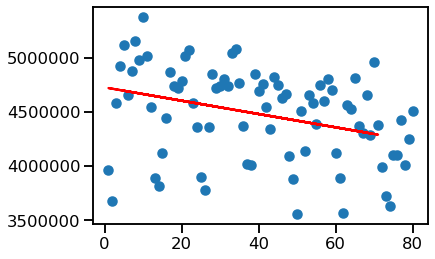

In [63]:
#Modelo regresor comparado a valores reales de la empresa DOTA
plt.scatter(x2, y2)
plt.plot(x2test, y2pred, color='red')
plt.show()

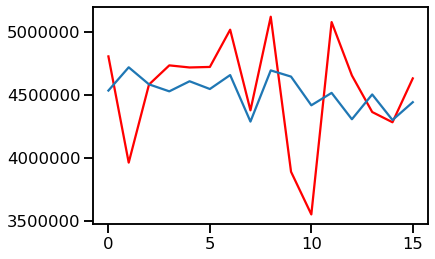

In [64]:
f11 = plt.plot(y2test, c='red')
f21 = plt.plot(y2pred)
plt.show()

# MACHINE LEARNING


### MODELO SVR
Empresa Nuevos Rumbos

In [65]:
#Aplicamos SVR
def data_processing(df, tback=3, tforw=1):
    xdata, ydata = [], []
    for i in range(df.shape[0] - tback - tforw + 1):
        xdata.append(df[i:i+tback])
        ydata.append(df.iloc[i+tback])
    xdata = np.array(xdata).reshape(-1, tback)
    ydata = np.array(ydata).reshape(-1, tforw)
    return xdata, ydata

In [66]:
x_data, y_data = data_processing(empresa2['SumadeCANTIDAD'], tback=5)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=50)

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [69]:
scal_x = MinMaxScaler().fit(x_train)
x_train_scal = scal_x.transform(x_train)
x_test_scal = scal_x.transform(x_test)

In [70]:
scal_y = MinMaxScaler().fit(y_train)
y_train_scal = scal_y.transform(y_train)
y_test_scal = scal_y.transform(y_test)

In [71]:
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [72]:
params = {'kernel':['rbf', 'poly'], 'degree':list(range(1, 5)), 'C':list(range(1, 10)), 'gamma':['auto', 'scale'], 'tol':[0.0001, 0.001, 0.01, 0.1]}

In [73]:
#
svm_regresion = SVR()

In [74]:
svm_grid = GridSearchCV(estimator=svm_regresion, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
svm_grid.fit(x_train_scal, y_train_scal.reshape(-1, ))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'degree': [1, 2, 3, 4], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [75]:
svm_grid.best_params_

{'C': 5, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.1}

In [76]:
y_pred = scal_y.inverse_transform(svm_grid.predict(x_test_scal).reshape(-1, 1))

In [77]:
r2_score(y_test, y_pred)

0.5837542389684219

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred))

184303.8262841956

In [79]:
mean_squared_error(y_test, y_pred)

33967900382.99495

In [80]:
mean_absolute_error(y_test, y_pred)

161385.04833830154

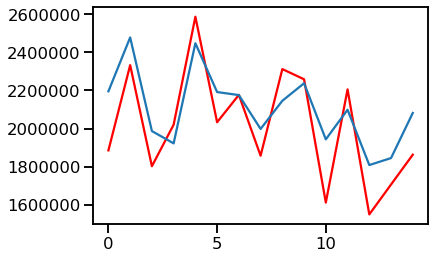

In [81]:
f1 = plt.plot(y_test, c='red')
f2 = plt.plot(y_pred)
plt.show()

### MODELO SVR

Empresa DOTA

In [82]:
x2_data, y2_data = data_processing(empresa4['SumadeCANTIDAD'], tback=5)

In [83]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_data, y2_data, test_size=0.20, random_state=50)

In [84]:
scal_x2 = MinMaxScaler().fit(x2_train)
x2_train_scal = scal_x2.transform(x2_train)
x2_test_scal = scal_x2.transform(x2_test)

In [85]:
scal_y2 = MinMaxScaler().fit(y2_train)
y2_train_scal = scal_y2.transform(y2_train)
y2_test_scal = scal_y2.transform(y2_test)

In [86]:
params = {'kernel':['rbf', 'poly'], 'degree':list(range(1, 5)), 'C':list(range(1, 10)), 'gamma':['auto', 'scale'], 'tol':[0.0001, 0.001, 0.01, 0.1]}

In [87]:
svm_grid2 = GridSearchCV(estimator=svm_regresion, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, refit=True)
svm_grid2.fit(x2_train_scal, y2_train_scal.reshape(-1, ))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'degree': [1, 2, 3, 4], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [88]:
svm_grid2.best_params_

{'C': 7, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.001}

In [89]:
y2_pred = scal_y2.inverse_transform(svm_grid2.predict(x2_test_scal).reshape(-1, 1))

In [90]:
r2_score(y2_test, y2_pred)

0.43941101519594405

In [91]:
np.sqrt(mean_squared_error(y2_test, y2_pred))

306264.3156524925

In [92]:
mean_squared_error(y2_test, y2_pred)

93797831042.08957

In [93]:
mean_absolute_error(y2_test, y2_pred)

272570.1855275299

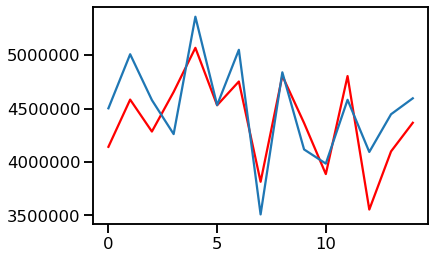

In [94]:
f1 = plt.plot(y2_test, c='red')
f2 = plt.plot(y2_pred)
plt.show()